In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## import the mean data

CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

## pick a nutrient 0 = phosphate, 1 = nitrate, 2 = iron, 3 = silica
v=1

# import CR data

in_file = '%supflux/CR_WN.1999.data' % CRindir
CRWN = np.fromfile(in_file, dtype='>f').reshape(4,160, 360)
CRmask = ma.masked_where(HFCR[6,:,:] == 0, CRWN[v,:,:], copy=False)

#import grid params for HR grid
HFHR = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/hFacC')
XG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/XG')
YG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/YG')
RAC = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/RAC')

# import HR data
in_file = '%supflux/WN.1999.data' % HRindir
HRWN = np.fromfile(in_file, dtype='>f').reshape(4, 510, 3060)
HRmask = ma.masked_where(HFHR[10,:,:] == 0, HRWN[v,:,:], copy=False)

for n in range(4):
    tmp = np.squeeze(CRWN[n, :, :])
    tmp[[np.squeeze(HFCR[6,:,:]) == 0]] = np.nan
    CRWN[n, :, :] = tmp

    tmp = np.squeeze(HRWN[n, :, :])
    tmp[[np.squeeze(HFHR[10,:,:]) == 0]] = np.nan
    HRWN[n, :, :] = tmp


In [3]:
## calculate the product of time averaged N and W

infile = '%sextract/NutsZoo/NutsZoo.1999.data' % CRindir
CRN = np.fromfile(infile, dtype ='>f').reshape(21, 23, 160, 360)
infile = '/Users/sclayton/Google Drive/work/comparison/data/annual/CR/W.1999.data'
CRW = np.fromfile(infile, dtype = '>f').reshape(23, 160, 360)*60*60*24

mCRWN = (np.nanmean(CRN[1, 6:8,:,:])*CRW[6,:,:])
#mCRWN = ma.masked_where(HFCR[6,:,:] == 0, CRWN[n,:,:], copy=False)

## get HR version

infile = '/Volumes/My Passport/high_res/WVEL_1999.data'
HRW = np.fromfile(infile, dtype='>f').reshape(50,510,3060)
#HRN = np.fromfile()

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The shading option was deprecated in version 1.2. Use edgecolors instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


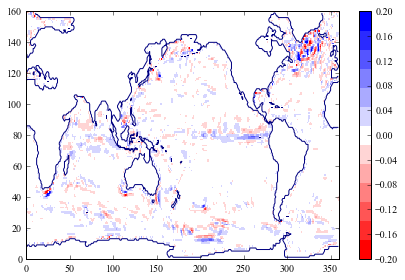

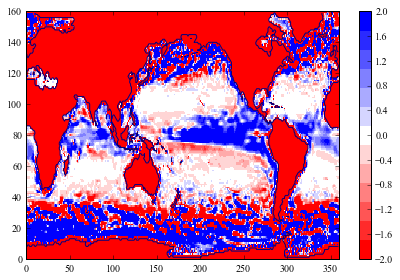

In [4]:
palette = plt.get_cmap('bwr_r', 13)

plt.pcolor(mCRWN,shading ='flat', vmin= -0.2, vmax = 0.2, cmap = palette)
plt.colorbar()
plt.contour(HFCR[0,:,:], levels=[0])

plt.show()

plt.pcolor(np.squeeze(CRWN[1, :,:]), shading ='flat', vmin= -2, vmax = 2, cmap = palette)
plt.colorbar()
plt.contour(HFCR[0,:,:], levels=[0])
plt.show()

In [6]:
## calculate the eddy upflux

HRWNanom = np.zeros((4, 12, 510, 3060))
CRWNanom = np.zeros((4, 12, 160, 360))

HRWNmon = np.zeros((4, 12, 510, 3060))
CRWNmon = np.zeros((4, 12, 160, 360))

d = 1
nd = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ed = np.cumsum(nd)
sd = np.ones(12)
sd[1:12] = ed[0:11]
sd = sd.astype(int)

for m in range(12):
    for d in range(sd[m], ed[m]+1):
    
        infile = '%supflux/WN.1999.%03d.data' % (HRindir, d)
        tmph = np.fromfile(infile, dtype = '>f').reshape(4,510, 3060)

        infile = '%supflux/CR_WN.1999.%03d.data' % (CRindir, d)
        tmpc = np.fromfile(infile, dtype = '>f').reshape(4,160,360)

        for n in range(4):
            HRWNanom[n,m,:,:] =+ HRWN[n,:,:]
            CRWNanom[n,m,:,:] =+ CRWN[n,:,:]

            HRWNmon[n,m,:,:] =+ HRWN[n,:,:]
            CRWNmon[n,m,:,:] =+ CRWN[n,:,:]

            
    HRWNmon[:,m,:,:]=HRWNmon[:,m,:,:]/nd[m]
    CRWNmon[:,m,:,:]=CRWNmon[:,m,:,:]/nd[m]
    
HRWNmon.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR/HRWN.monthly1999.data') 
CRWNmon.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/CRWN.monthly1999.data') 

In [ ]:
# work out the latitudinally averaged vertical nutrient supply

n = 1
m = 3

# EG
CRHFmask = CRWNanom[n,m,:,:] *HFCR[6,:,:]*RA
binsize = 5
ybin = np.arange(-60, 60+binsize, binsize)

binnedcr = np.empty([len(ybin)])
numobs = np.empty([len(ybin)])
areacr = np.empty([len(ybin)])

for i in range(len(ybin)):
    lat = ybin[i]

    nn = len((YC>=lat-binsize/2) & (YC<lat +binsize/2))
    if nn > 0:
        #print YC[[(YC>(lat-binsize/2)) & (YC<(lat +binsize/2))]]
        areacr[i] = np.nansum(RA[(YC>=lat-binsize/2) & (YC<lat +binsize/2)])
        binnedcr[i] = np.nansum(CRHFmask[(YC>=lat-binsize/2) & (YC<lat +binsize/2)])/areacr[i]
        numobs[i] = nn
    
    else:
        binnedcr[i] = np.nan
        numobs[i] = np.nan

# E2
HRHFmask = HRWNanom[n,m,:,:] *HFHR[10,:,:]*RAC

binnedhr = np.empty([len(ybin)])
numobs = np.empty([len(ybin)])
areahr = np.empty([len(ybin)])

for i in range(len(ybin)):
    lat = ybin[i]

    nn = len((YG>=lat-binsize/2) & (YG<lat +binsize/2))
    if nn > 0:
        #print YC[[(YC>(lat-binsize/2)) & (YC<(lat +binsize/2))]]
        areahr[i] = np.nansum(RAC[(YG>=lat-binsize/2) & (YG<lat +binsize/2)])
        binnedhr[i] = np.nansum(HRHFmask[(YG>=lat-binsize/2) & (YG<lat +binsize/2)])/areahr[i]
        numobs[i] = nn
    
    else:
        binnedhr[i] = np.nan
        numobs[i] = np.nan

fig3 = plt.figure(3, figsize=(9,9), dpi = 600)

plt.plot(binnedcr*s_to_y, ybin,'.-r', label = 'CR', lw =2)
plt.plot(binnedhr*s_to_y, ybin,'.-b',label= 'HR',lw = 2)
plt.ylabel('Latitude', fontsize=20)
plt.legend(fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'Monthly total eddy vertical flux of NO3 at 100m', fontsize=20)
plt.axvline(0, color='k')
plt.axhline(35, color='k')
plt.axhline(5, color='k')
plt.axhline(-5, color='k')
plt.axhline(-35, color='k')
plt.axis([-600, 600, -60, 60])
plt.show()


In [ ]:
latmin = [40, 5, -5, -40, -60]
latmax = [60, 40, 5, -5, -40]
region = ['N SPolar', 'N STropic', 'Eq', 'S STropic', 'S SPolar']

v = 1

intFlux = np.zeros((2,5,12))

month = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O','N', 'D']
for m in range(12):
    print month[m]
    for l in range(len(region)):
        HRint = HRWNanom[v,m,:,:]*HFHR[0,:,:]*RAC
        subset = HRint[(YG>latmin[l]) & (YG<latmax[l])]
        intFlux[0,l,m] = np.nansum(subset)/(np.sum(RAC[(YG>latmin[l]) & (YG<latmax[l])]))
        
        CRint = CRWNanom[v,m,:,:]*HFCR[6,:,:]*RA
        subset = CRint[(YC>latmin[l]) & (YC<latmax[l])]
        intFlux[1,l,m] =  np.nansum(subset)/(np.sum(RA[(YC>latmin[l]) & (YC<latmax[l])]))


In [ ]:
plt.plot(range(12), intFlux[0,0,:],  'x-b',label = 'HR')
plt.plot(range(12), intFlux[1,0,:],  'x-r',label = 'CR')
plt.axhline(0, color = 'k')
plt.title('N SPolar')
plt.legend()
plt.show()

plt.plot(range(12), intFlux[0,1,:], 'x-b',label = 'HR')
plt.plot(range(12), intFlux[1,1,:], 'x-r', label = 'CR')
plt.axhline(0, color = 'k')
plt.title('N Subtropic')
plt.legend()
plt.show()

plt.plot(range(12), intFlux[0,2,:], 'x-b', range(12), intFlux[1,2,:], 'x-r')
plt.axhline(0, color = 'k')
plt.title('Eq')
plt.show()

plt.plot(range(12), intFlux[0,3,:], 'x-b', range(12), intFlux[1,3,:], 'x-r')
plt.axhline(0, color = 'k')
plt.title('S Subtropic')
plt.show()

plt.plot(range(12), intFlux[0,4,:], 'x-b', range(12), intFlux[1,4,:], 'x-r')
plt.axhline(0, color = 'k')
plt.title('S SPolar')
plt.show()